# Visualizing Data in Python

## 统计学中的表格、直方图、箱型图
当处理一个新的数据集时，最有用的事情之一是开始将数据可视化，通过表格、直方图、箱型图和其他可视化工具，我们可以更好地了解数据想传达的信息，可以获得没有发现的一些见解

In [1]:
# 首先需要 import 所需要使用的库
import seaborn as sns  # 用于绘图
import matplotlib.pyplot as plt  # 用于展示图

In [2]:
# 数据集
tips_data = sns.load_dataset("tips")

### 将数据可视化 - 表格
在开始处理一个新的数据集时，通常最好在开始其他分析之前先输出前几行

这将展示数据集中的数据种类、数据类型，并作为绘图的参考

In [3]:
# 输出数据的前几行
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 描述数据
数值摘要，包括平均值、最小值、最大值等，这些对于了解变量有多大，以及哪些变量可能是最重要的变量很有用

In [4]:
# 输出数值变量的数值摘要
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 绘制直方图
在对于数据有了总体感知之后，通常是对于数据分布的形状进行了解

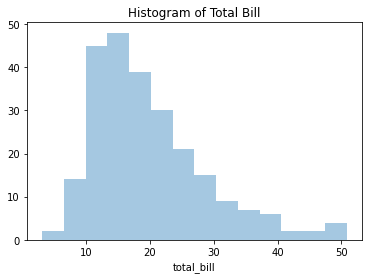

In [5]:
# 绘制 total_bill 的直方图
sns.distplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill")
plt.show()

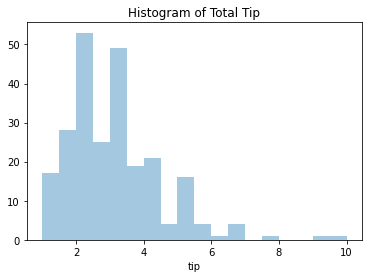

In [6]:
# 绘制 tip 的直方图
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Total Tip")
plt.show()

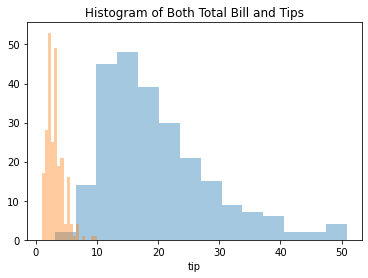

In [7]:
# 绘制 total_bill 和 tip 的直方图
sns.distplot(tips_data["total_bill"], kde = False)
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Both Total Bill and Tips")
plt.show()

### 绘制箱型图
箱型图并不能显示分布的形状，但是可以让我们更好地了解分布的中心和偏离程度以及任何可能存在的潜在异常值

箱型图和直方图经常相互补充，帮助分析人员获取更多的数据信息

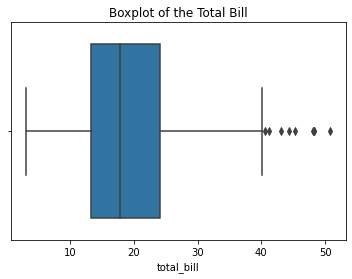

In [8]:
# 绘制 total_bill 的箱型图
sns.boxplot(tips_data["total_bill"]).set_title("Boxplot of the Total Bill")
plt.show()

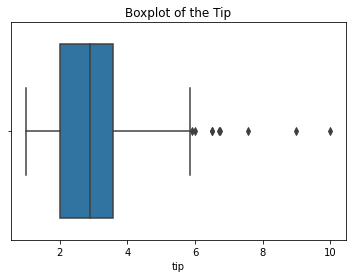

In [9]:
# 绘制 tip 的箱型图
sns.boxplot(tips_data["tip"]).set_title("Boxplot of the Tip")
plt.show()

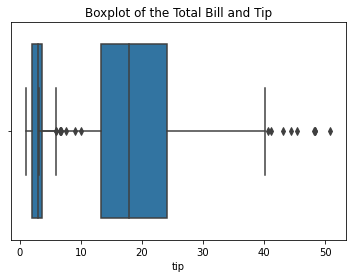

In [10]:
# 绘制 total_bill 和 tip 的箱型图
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Boxplot of the Total Bill and Tip")
plt.show()

### 按组绘制直方图和箱型图
* 尽管观察单个变量很有趣，但是通常情况下，观察一个变量如何随着另一个变量的变化而变化时很有用的
* 使用图表，我们可以看到吸烟者与不吸烟者的小费数额是否有差异，小费是否随一天的时间而变化，或者我们也可以探索数据中的其他趋势

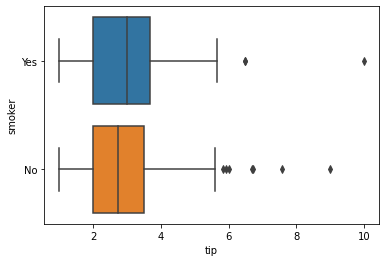

In [11]:
# 按照吸烟的状态分组绘制箱型图
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

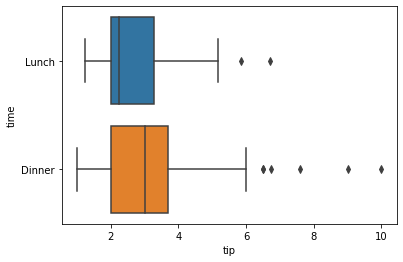

In [12]:
# 按照时间分组绘制箱型图
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])
plt.show()

关于 FaceGrid 可以点击这里查看更多 https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

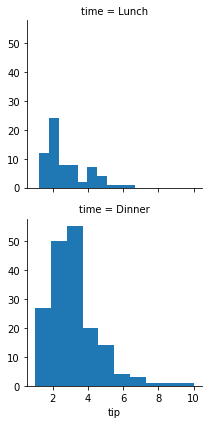

In [13]:
# 绘制按照时间分组的直方图
g = sns.FacetGrid(tips_data, row = "time")
g = g.map(plt.hist, "tip")
plt.show()

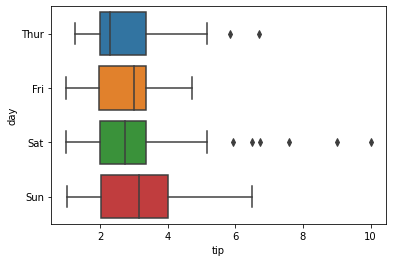

In [14]:
# 按照星期的分组绘制箱型图
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])
plt.show()

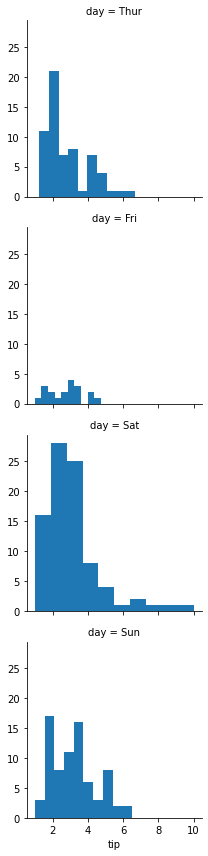

In [15]:
# 按照星期的分组绘制直方图
g = sns.FacetGrid(tips_data, row = "day")
g = g.map(plt.hist, "tip")
plt.show()

## 数据分析案例 -- NHANES

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
da = pd.read_csv("nhanes_2015_2016.csv")

### 频率表
* `value_counts` 方法可以用来确定一个变量的每个不同值在数据集中出现的次数，在统计学中就是 **频率分布** 
* 下面展示了 DMDEDUC2 变量的频率分布，是反映一个人受教育程度的变量
* `value_counts` 方法产生一个有两列的表
   * 第一列包含该变量的所有不同的观测值
   * 第二列包含每个值出现的次数
* `value_counts` 方法返回的表格实际上是一个Pandas数据框架
* 表格中显示1621人 DMDEDUC2 = 4 ，这表示1621人已经完成了一些大学学业，但是还没有获得四年制学位

In [18]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

* `value_counts` 方法不包括缺失值
* 通过将1、2、3、4、5、9的观测值相加起来与变量个数相比来确认是否有缺失值
* 5735 - 5474 = 261, 有一个缺失值

In [19]:
print(da.DMDEDUC2.value_counts().sum())
# 手动相加
print(1621 + 1366 + 1186 + 655 + 643 + 3)
print(da.shape)

5474
5474
(5735, 28)


* 判断缺失值的另一个方法，使用 `isnull` 方法

In [20]:
pd.isnull(da.DMDEDUC2).sum()

261

* 在某些情况下，用反映编码含义的文本标签代替整数编码是很有用的
* 创建一个名为 'DMDEDUC2x' 的新变量，用文本标签重新编码，然后生成其频率表

In [21]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

* 对性别重新编码

In [22]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2: "Female"})
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

* 考虑样本中每一类值的比例比每一类别中的人数更有意义

In [23]:
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

* 处理缺失值，将其单独作为一类

In [24]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

### 数值摘要
* 使用 `describe` 方法, 用 `dropna` 方法删除缺失值

In [25]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

* 使用 Pandas 方法或者 NumPy 函数完成某一列的汇总统计

In [26]:
x = da.BMXWT.dropna()
print("Pandas method - the mean is",x.mean())
print("NumPy function - the mean is",np.mean(x))
print("Pandas method - the median is", x.median())
print("NumPy function - the 50% / median is",np.percentile(x, 50))
print("NumPy function - the 75% is",np.percentile(x, 75))
print("Pandas method - the 75% is",x.quantile(0.75))

Pandas method - the mean is 81.34267560889516
NumPy function - the mean is 81.34267560889516
Pandas method - the median is 78.2
NumPy function - the 50% / median is 78.2
NumPy function - the 75% is 92.7
Pandas method - the 75% is 92.7


* 收缩压测量的频率
* 当一个人的收缩压在120～139之间，或舒张压在80～89之间时，一般认为是高血压前期

In [27]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

* 只考虑收缩压的情况，可以计算样本中被认为有高血压前期的人的比例

In [28]:
np.mean((da.BPXDI1 >=80) & (da.BPXDI2 <= 89))

0.14803836094158676

* 创建临时变量'a'和'b'，分别持有收缩压和舒张压的高血压前期状况，然后用 "逻辑或 "将它们组合起来，得到每个受试者的最终状况

In [29]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))

0.43975588491717527


* 血压测量会受到一种叫做白大褂焦虑的现象的影响，即受试者在与医护人员交流时，如果紧张，其血压可能会略有升高，一般来说，如果依次测量几次血压，这种影响就会消失
* 在NHANES中，每个受试者的收缩压和舒张压都要测量三次（例如BPXSY2是第二次测量收缩压）
* 可以通过观察前两次收缩压或舒张压测量值之间的平均差异来计算白大褂焦虑在NHANES数据中的存在程度

In [30]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

0.6749860309182343
0.3490407897187558


### 图形总结

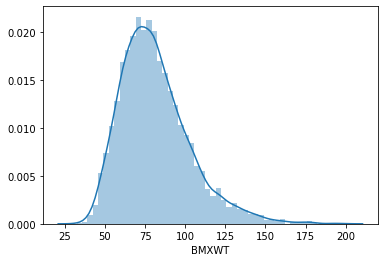

In [31]:
# 体重分布的直方图，右偏分布
sns.distplot(da.BMXWT.dropna())

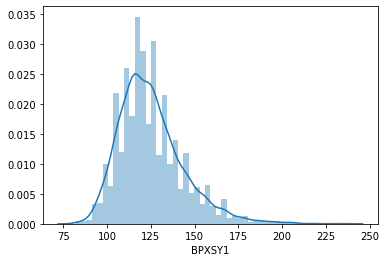

In [32]:
# 收缩压测量的直方图，
sns.distplot(da.BPXSY1.dropna())

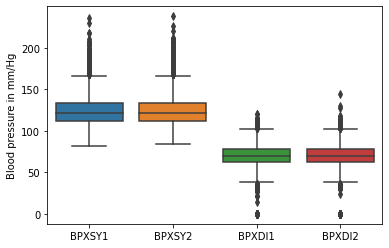

In [33]:
# 为了比较几个分布，使用多个箱型图，舒张压测量值大大低于收缩压测量值
bp = sns.boxplot(data = da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

### 分层
* 从数据集中获取更多信息的有效方法之一是将数据集划分为更小、更统一的子集，并对这些"层"中的每一个进行单独分析
* 可以正式或非正式地比较不同层中的发现
* 根据人口统计学因素（年龄、性别、种族）进行分层是非常常见的

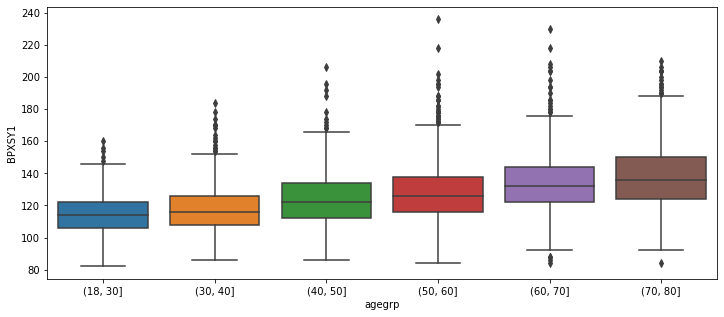

In [36]:
# 根据分割点创建年龄层
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
# 让图形比默认的宽，12cm x 5cn
plt.figure(figsize = (12, 5))
# 绘制按年龄分层的 BPXSY1 箱型图
sns.boxplot(x = "agegrp", y = "BPXSY1", data = da)

* 因为不同性别之间的血压存在差异，而且已经确定了年龄与血压密切相关，所以可以按照性别和年龄对数据进行双重的分层
* 从下图中可以看出，每个性别内，老年人的血压往往比年轻人高
* 在同一个年龄段内，性别和收缩压之间的关系有点复杂
  * 对于年轻人来说，男性的血压大大高于同龄女性
  * 对于50岁以上的人来说，这种关系就变得弱很多
  * 对于70岁以上的人来说，这种关系发生了逆转

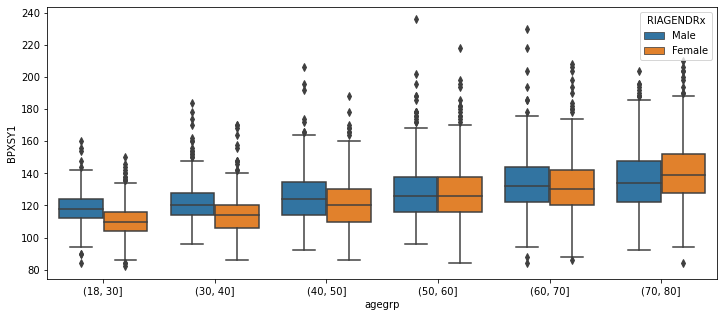

In [38]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize = (12, 5))
sns.boxplot(x = "agegrp", y = "BPXSY1", hue = "RIAGENDRx", data = da)

* 在对两个因素（年龄、性别）进行分层时，可以先按年龄进行分组，在年龄段内按照性别进行分组,也可以先按照性别进行分组，再在性别段内按照年龄分组
* 每种方法都能突出数据的不同方面

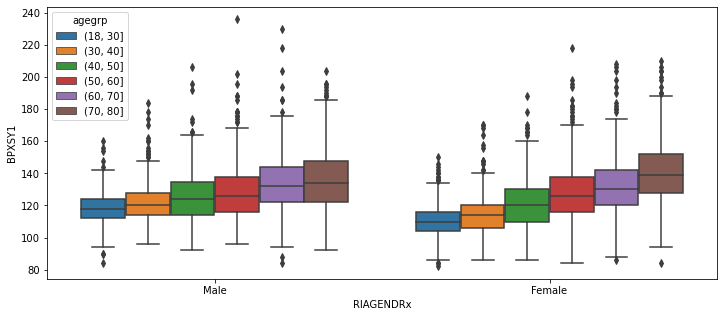

In [39]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize = (12, 5))
sns.boxplot(x = "RIAGENDRx", y = "BPXSY1", hue = "agegrp", data = da)

* 在处理分类数据时，分层也很有用
* 对于教育程度DMDEDUC2不同年龄段的频率分布
  * 虽然 some college 是所有年龄段中最常见的回答
  * 但是到60岁左右，第二常见的回答是 college
  * 对于50岁以上的人来说，只有 HS/GED 的人比 collage graduates 多

In [40]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

* 还可以按照年龄、性别进行分层，以探讨教育程度如何同时因这两个因素而变化
* 将教育水平转入各列，并将计数标准化，使得它们的的总和为一，这样解释结果比较容易
* 从结果中可以看出
  * 对60岁左右的人来说，女性比男性更有可能从大学毕业
  * 对于60岁以上的人来说，男性比女性更有可能从大学毕业


In [49]:
# 去除罕见值、缺失值
dx = da.loc[da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
print("the dx before")
print(dx)
print("\n")
# 将结果从 long 调整为 wide
dx = dx.unstack()
print("the dx after unstack")
print(dx)
print("\n")
# 对每个层级内的比例归一化
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
# 保留小数点后三位
print(dx.to_string(float_format = "%.3f"))

the dx before
agegrp    RIAGENDRx  DMDEDUC2x 
(18, 30]  Female     Missing       56
          Male       Missing       72
(70, 80]  Female     Don't know     1
          Male       Don't know     2
Name: DMDEDUC2x, dtype: int64


the dx after unstack
DMDEDUC2x           Don't know  Missing
agegrp   RIAGENDRx                     
(18, 30] Female            NaN     56.0
         Male              NaN     72.0
(70, 80] Female            1.0      NaN
         Male              2.0      NaN


DMDEDUC2x           Don't know  Missing
agegrp   RIAGENDRx                     
(18, 30] Female            NaN    1.000
         Male              NaN    1.000
(70, 80] Female          1.000      NaN
         Male            1.000      NaN
